In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter
from qiskit_aer.primitives import Sampler, Estimator
from qiskit_algorithms.optimizers import SLSQP, SPSA
import pylatexenc
from qiskit_ibm_runtime.fake_provider import FakeKolkata
from qiskit.circuit.library import EfficientSU2
import numpy as np
import qiskit_nature
from qiskit_algorithms import NumPyMinimumEigensolver, VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit_nature.second_q.transformers import FreezeCoreTransformer
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
from qiskit_nature.second_q.drivers import PySCFDriver
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit_aer.primitives import Estimator
from qiskit_aer.noise import NoiseModel
from qiskit_algorithms.optimizers import SLSQP, SPSA, COBYLA
from qiskit_aer.noise import NoiseModel

import pandas as pd
import matplotlib.pyplot as plt

from moleculemanager import MoleculeManager

In [2]:
LiOH_info = MoleculeInfo(
        symbols=["Li", "O", "H"],
        coords=([-1.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, 0.0]),
        multiplicity=1,  # = 2*spin + 1
        charge=0,
    )

LiOH = MoleculeManager(LiOH_info)

## wide approximation

In [3]:
E = LiOH.FindExactEnergy()
print(f'{E = }')

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -99.278186094361
  - computed part:      -22.34257524779
  - FreezeCoreTransformer extracted energy part: -76.93561084657
~ Nuclear repulsion energy (Hartree): 17.72743656582
> Total ground state energy (Hartree): -81.550749528541
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-3.77945225  0.0  0.0]
 
-81.55074952854073
E = -81.55074952854073


In [6]:
LiOH_dist = np.linspace(1, 10, 5)

LiOH_energies = []

for dist in LiOH_dist:
  print(f'\n\n= = = = = = = = = = = = |{dist = }| = = = = = = = = = = = = = = =\n')
  LiOH.SetAtomCoords(([-dist, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, 0.0]))
  # E = LiOH.FindEnergyIdeal(print_energy=False, print_ansatz=False, print_circuit_info=False)
  E = LiOH.FindExactEnergy(debug_mode=True)
  print(f'SUMMARY: for {dist = } we get {E = }')
  LiOH_energies.append(E)



= = = = = = = = = = = = |dist = 1.0| = = = = = = = = = = = = = = =

FindEnergyIdeal started, 10:34:52
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -99.278186094361
  - computed part:      -22.34257524779
  - FreezeCoreTransformer extracted energy part: -76.93561084657
~ Nuclear repulsion energy (Hartree): 17.72743656582
> Total ground state energy (Hartree): -81.550749528541
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-3.77945225  0.0  0.0]
 
-81.55074952854082
SUMMARY: for dist = 1.0 we get E = -81.55074952854082


= = = = = = = = = = = = |dist = 3.25| = = = = = = = = = = = = = = =

FindEnergyIdeal started, 10:35:32
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -90.227012818468
  - computed part:      -20.40368399054
  - FreezeCoreTransformer extracted energy part: -69.823328827928
~ Nuclear repulsion energy (Hartree): 8.514724715075
> Total ground state energy (Hartree): -81.71

In [ ]:
# LiOH_dist = np.linspace(1, 10, 5)

# LiOH_energies = []

# for dist in LiOH_dist:
#   LiOH.SetAtomCoords(([-dist, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, 0.0]))
#   E = LiOH.FindEnergyIdeal(print_energy=False, print_ansatz=False, print_circuit_info=False)
#   print(f'for {dist = } we get {E = }')
#   LiOH_energies.append(E)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


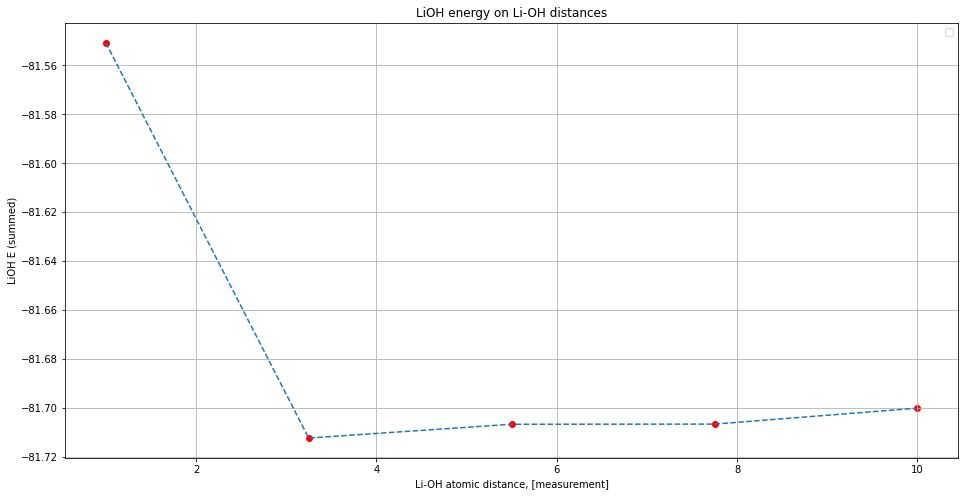

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))  
plt.plot(LiOH_dist, LiOH_energies, linestyle='--')
plt.scatter(LiOH_dist, LiOH_energies, color='r')
plt.xlabel('Li-OH atomic distance, [measurement]')
plt.ylabel('LiOH E (summed)')
plt.title('LiOH energy on Li-OH distances')
plt.legend()
plt.grid()
plt.savefig('plots/LiOH_distances_left.png')
plt.show()

In [8]:
import pandas as pd

LiH_distance_experiment_dataframe = pd.DataFrame({
    'distance': LiOH_dist,
    'LiOH_E': LiOH_energies,
})
LiH_distance_experiment_dataframe.to_csv('./data/LiOH_wide_range_approx_NO_VQE.csv')

## narrow approximation